In [1]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv(r"C:\Users\lamaq\OneDrive\Desktop\DS project components\.env")
groq_api_key = os.getenv('GROQ_API_KEY')
os.environ['GROQ_API_KEY'] = groq_api_key

In [3]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    api_key=groq_api_key,
    model="llama-3.3-70b-versatile",
    temperature=0.8,
    max_tokens=1028,
    max_retries=2,
    verbose=True,
)

In [8]:
import pandas as pd

uploaded_file = "test_clean.csv"
dataset = pd.read_csv(uploaded_file)
dataset_summary = dataset.describe(include="all").to_string()
dataset_summary

'               Age            Cabin Embarked        Fare              Name       Parch  PassengerId      Pclass   Sex       SibSp  Survived    Ticket Title  Family_Size\ncount   418.000000               91      418  418.000000               418  418.000000   418.000000  418.000000   418  418.000000       0.0       418   418   418.000000\nunique         NaN               76        3         NaN               418         NaN          NaN         NaN     2         NaN       NaN       363     6          NaN\ntop            NaN  B57 B59 B63 B66        S         NaN  Kelly, Mr. James         NaN          NaN         NaN  male         NaN       NaN  PC 17608    Mr          NaN\nfreq           NaN                3      270         NaN                 1         NaN          NaN         NaN   266         NaN       NaN         5   242          NaN\nmean     29.812201              NaN      NaN   35.561214               NaN    0.392344  1100.500000    2.265550   NaN    0.447368       NaN       NaN

In [12]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt_template = """
You are an expert Python data visualization developer. Your task is to generate Python code for a clean and functional data visualization based on the following input:

Features: {features}
Dataset summary: {dataset_summary}
Visualization type: {visualization_type}

Requirements:
1. The code must assume the dataset is already loaded into a variable called 'dataset'.
2. Ensure the code uses matplotlib or seaborn.
3. Handle edge cases like missing columns or empty datasets with error checks.
4. Return only the Python code block that can be executed directly without any additional modifications.
5. Do not include any additional text, comments, or triple backticks in your response.
"""

prompt = PromptTemplate(input_variables=["features", "dataset_summary", "visualization_type"], template=prompt_template)
output_parser = StrOutputParser()
chain = prompt | llm |output_parser

In [13]:
response = chain.invoke({"features" : "Pclass based on sex" , "dataset_summary": dataset_summary , "visualization_type" : "Bar Chart"})
response

'```python\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\n\ndef visualize_pclass_based_on_sex(dataset):\n    if not isinstance(dataset, pd.DataFrame):\n        raise ValueError("Dataset must be a pandas DataFrame")\n\n    required_columns = [\'Pclass\', \'Sex\']\n    if not all(column in dataset.columns for column in required_columns):\n        raise ValueError("Dataset is missing required columns")\n\n    if dataset.empty:\n        raise ValueError("Dataset is empty")\n\n    pclass_counts = dataset.groupby([\'Sex\', \'Pclass\']).size().reset_index(name=\'count\')\n    pclass_pivot = pclass_counts.pivot(index=\'Sex\', columns=\'Pclass\', values=\'count\')\n\n    plt.figure(figsize=(10,6))\n    sns.countplot(x=\'Pclass\', hue=\'Sex\', data=dataset)\n    plt.title(\'Pclass based on Sex\')\n    plt.xlabel(\'Pclass\')\n    plt.ylabel(\'Count\')\n    plt.legend(title=\'Sex\')\n    plt.show()\n\nvisualize_pclass_based_on_sex(dataset)\n```'

In [16]:
import re

# Using re.sub to remove ```python and ```
cleaned_code = re.sub(r'^```python|```$', '', response, flags=re.MULTILINE)


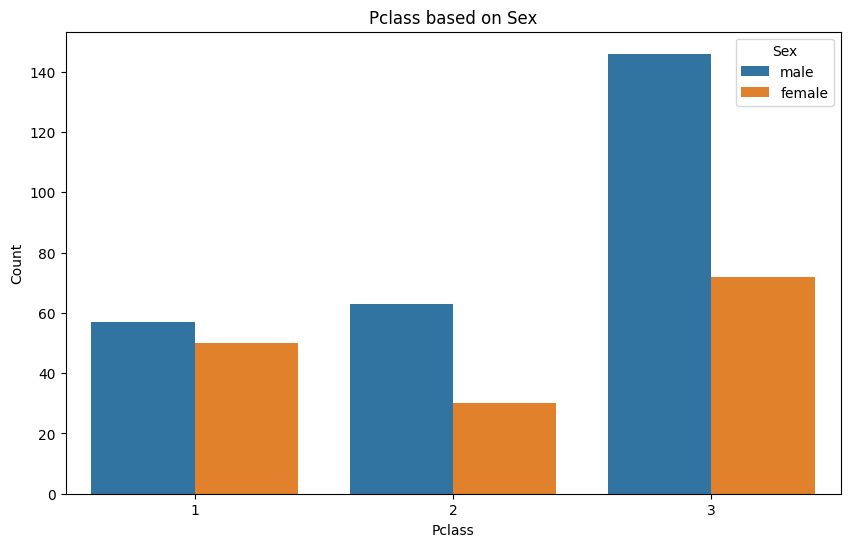

In [18]:
exec(cleaned_code)